© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# Linear classification setup

In this class, we will prepare some visualization and data preprocessing tools for linear classification. 

We will start with **linear binary classification**, i.e. we will only have two classes with labels $(1,-1)$, and use the **Iris dataset** that you already know as the first example.

We start out importing all required packages:

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

## Load the data

Next we load the Iris data set from the url: https://archive.ics.uci.edu/ml/datasets/iris
Note that the column names are missing in the CSV file. They are described in the accompanying file: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names.

📌 Since the Iris dataset has become the machine learning "Hello, World!" equivalent, it is also a part of many machine learning libraries. For example, it's [included](https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html) in `datasets` module of `scikit-learn` library.

📌 Loading and preprocessing data is often a tedious task that can take up a lot of ML researcher's time, because public dataset come in very different formats. Therefore, high-level ML frameworks (especially deep learning frameworks) often include data modules with ready-to-use versions of common datasets to speed up implementation and testing of ML algorithms. 


In [2]:
file_name = 'iris_data_set.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal length [cm]', 'sepal width [cm]',
                'petal length [cm]', 'petal width [cm]', 'iris type']

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, names=column_names)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `iris_data_set.csv`...


Let us inspect the data again:

In [3]:
df

,Unnamed: 0,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],iris type
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


## Assign class labels

There are three classes in the Iris dataset. Since we work with binary classification in this class, we will merge two of the original classes into one. Now Iris-setosa will have class label $-1$ and the two other kinds of irises will form class with label $+1$:

In [4]:
df['class'] = df['iris type'].replace(
    ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    [-1, 1, 1])

/var/folders/9v/zb2h9_ys5yz0c88dl39lnxbh0000gn/T/ipykernel_31413/859164777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['iris type'].replace(


## Train-test splits

In ML, we usually split our data into **training** and **test sets** to evaluate how well a model can generalize to new, unseen data.

- The training set is used to **fit** the model — the model learns patterns from this data.
- The test set is kept separate and used only for **evaluation**, to check how well the model performs on data it hasn't seen before.

This helps prevent **overfitting**, where a model learns the training data too well but fails to perform on new data. By comparing performance on both sets, we can tell if the model is learning meaningful patterns — not just memorizing the data.

📌 Some pipelines also include a **validation** split, which is used to tune hyperparameters of ML methods but not to directly fit the data. For now, we won't need this.

We define a function to perform a random train-test split:

In [5]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    """
    Split all available data into a training and test data set.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame of available data.

    training_data_fraction : float
        The fraction of the data that should be used for training.
        E.g., `training_data_fraction=0.6` means 60%.

    shuffle : bool , optional
        If True, randomly reshuffles the data before the split.

    Returns:
    -------
    _df : DataFrame
        Shuffled DataFrame

    train_df: DataFrame
        Train split
        
    test_df: DataFrame
        Test split
    """
    
    if shuffle is True:
        _df = df.sample(frac=1).reset_index(drop=True)
    else:
        _df= df
    
    train_df = _df.iloc[:round(training_data_fraction*len(_df)),:]
    test_df = _df.iloc[round(training_data_fraction*len(_df)):,:]
    
    return _df, train_df, test_df

We can use this function as follows:

In [6]:
training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

# convert DataFrame entries to Numpy arrays
# `X, Y`: all data
# `train_X, train_Y`: training data
# `test_X, test_Y`: training data

X = df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
Y = df['class'].to_numpy()

train_X = train_df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
train_Y = train_df['class'].to_numpy()

test_X = test_df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
test_Y = test_df['class'].to_numpy()

print('Training data split as follows:')
print(f'  Training data samples: {len(train_df)}')
print(f'      Test data samples: {len(test_df)}')

Training data split as follows:
  Training data samples: 120
      Test data samples: 30


### 📌 Sidenote: Documentation

Our `train_test_split` function includes ✨documentation✨!

It’s a **good practice** to include documentation in your code — especially if anyone else (including future you!) might use it.

Getting comfortable with **writing** and **reading documentation** is an essential part of learning to code.

In [7]:
?train_test_split

Signature: train_test_split(df, training_data_fraction, shuffle=True)
Docstring:
Split all available data into a training and test data set.

Parameters:
-----------
df : DataFrame
    DataFrame of available data.

training_data_fraction : float
    The fraction of the data that should be used for training.
    E.g., `training_data_fraction=0.6` means 60%.

shuffle : bool , optional
    If True, randomly reshuffles the data before the split.

Returns:
-------
_df : DataFrame
    Shuffled DataFrame

train_df: DataFrame
    Train split

test_df: DataFrame
    Test split
File:      /var/folders/9v/zb2h9_ys5yz0c88dl39lnxbh0000gn/T/ipykernel_31413/2708045572.py
Type:      function


This documentation was generated directly from the *docstring* that we included right after the function name. Under the hood, the docstring gets saved as the function `__doc__` argument:

In [8]:
train_test_split.__doc__

'\nSplit all available data into a training and test data set.\n\nParameters:\n-----------\ndf : DataFrame\n    DataFrame of available data.\n\ntraining_data_fraction : float\n    The fraction of the data that should be used for training.\n    E.g., `training_data_fraction=0.6` means 60%.\n\nshuffle : bool , optional\n    If True, randomly reshuffles the data before the split.\n\nReturns:\n-------\n_df : DataFrame\n    Shuffled DataFrame\n\ntrain_df: DataFrame\n    Train split\n\ntest_df: DataFrame\n    Test split\n'

💡 Docstrings usually follow this format:

- Short summary of the function
- Description of parameters
- Description of return values

## Visualize the training data

For now, we will work with two-dimensional data to visualize every step easily and get intuition about basic ML concepts. Of course, we will also use real high-dimensional data very soon (starting from this week's homework).

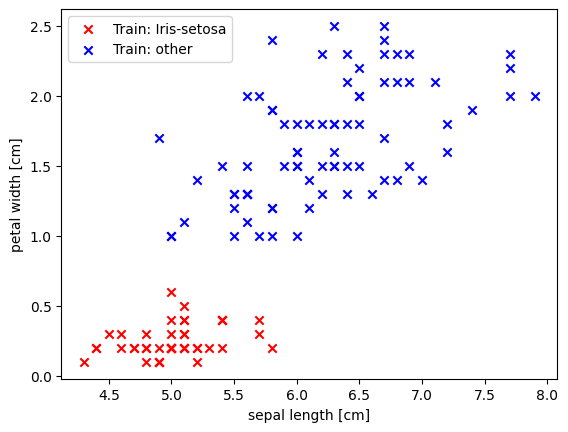

In [9]:
fig, ax = plt.subplots()

train_X_minus1 = train_X[train_Y == -1]
plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa')

train_X_plus1 = train_X[train_Y == +1]
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend()

## Define a class for Linear Binary Classification

Many high-level ML frameworks, including `scikit-learn`, implement ML models as Python **classes**. This follows the [object-oriented programming (OOP) paradigm](https://en.wikipedia.org/wiki/Object-oriented_programming). While it's not the only way to structure ML frameworks, in this course we also adopt the OOP approach — it helps keep things modular, reusable, and organized as your projects grow in complexity.

🔔 Are you comfortable with OOP and Python classes? Or should we cover it in more detail?

Our class `LinearBinaryClassification` will realize the following decision function (or *hypothesis*):
 $$h_{w,b}(x)=\text{sign}(w\cdot x+b),$$
and store the parameters $(w,b)$ as *class attributes*.

In [10]:
class LinearBinaryClassification:
    """
    Linear binary classification class.

    Stores a linear classification model with parameters (w,b)
    and decision function h(x) = sign(w @ x + b)

    Parameters:
    ----------
    w: array
    b: array

    """
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def __call__(self, x):
        # Numpy's `where` function provides a fast substitution
        return np.where(x @ self.w + self.b >= 0.0, 1, -1)

For now, the class only has two *methods*:
 - ``__init__``: sets up the model with weights `w` and bias `b`, called automatically when you create an instance of the class.
 - ``__call__``: lets you apply the model to new inputs using `model(x)` syntax.

We can use this class as follows:

In [11]:
w = np.array([0.2, 1])
b = -1.8
model = LinearBinaryClassification(w, b)

x = np.array([4, 5])

print(f'For weight row vector w={w}, bias term b={b}, and argument vector x={x},\n'
      f'the model output is {model(x)}.')

For weight row vector w=[0.2 1. ], bias term b=-1.8, and argument vector x=[4 5],
the model output is 1.


## Visualize decision regions

Let's for now choose parameters manually and visualize the decision regions of the model, i.e., parts of the inputs space where model given output $+1$ and $-1$.

In [12]:
w = np.array([-1, 3])
b = 1
model = LinearBinaryClassification(w, b)

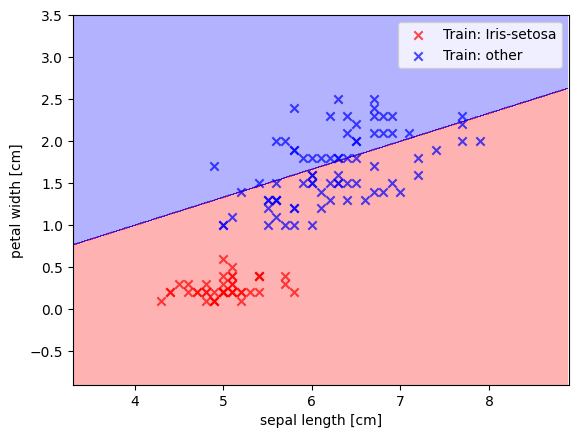

In [13]:
fig, ax = plt.subplots()

# compute how large the mesh for the contour plot shall be (with +/- 1 as
# safety bleed)
x1_min = train_X[:, 0].min() - 1
x1_max = train_X[:, 0].max() + 1
x2_min = train_X[:, 1].min() - 1
x2_max = train_X[:, 1].max() + 1

# compute grid for contour plot
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .01))
# meshgrid produces two arrays of the size `len(np.arange(x1_min, x1_max,
# .01))` times `len(np.arange(x2_min, x2_max, .01))` so that computations can
# be easily be vectorized.
X_list = np.dstack([x1_grid, x2_grid])
# present X_list to our hypothesis for evaluation
h_grid = model(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_grid, x2_grid, h_grid, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.xlim(x1_min, x1_max)
plt.ylabel('petal width [cm]')
plt.ylim(x2_min, x2_max)
plt.legend()

We can also add the test data to the plot:

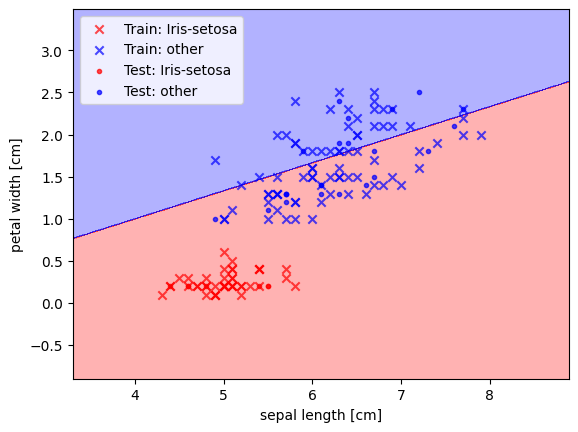

In [14]:
fig, ax = plt.subplots()

plt.contourf(x1_grid, x2_grid, h_grid, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

test_X_minus1 = test_X[test_Y == -1]
test_X_plus1 = test_X[test_Y == +1]
plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend()

## Evaluate accuracy

In [15]:
N = len(train_X)
train_errors = np.sum(model(train_X) != train_Y)
print(f'Sample size: {N}')
print(f'Number of correct classifications: {N - train_errors}')
print(f'Number of incorrect classifications: {train_errors}')

Sample size: 120
Number of correct classifications: 74
Number of incorrect classifications: 46


In [16]:
def accuracy(y_pred,y_true):
    return (np.sum(y_pred == y_true)/y_true.size)*100

print(f"Train accuracy: {accuracy(model(train_X),train_Y)}")
print(f"Test accuracy: {accuracy(model(test_X),test_Y)}")

Train accuracy: 61.66666666666667
Test accuracy: 50.0


## Is the data linearly separable?

Yes. Try $w=(0, 1)$ and $b=-0.8$ and observe the accuracy.

In [17]:
w = np.array([0, 1])
b = -0.8
model = LinearBinaryClassification(w, b)

print(f"Train accuracy: {accuracy(model(train_X),train_Y)}")

Train accuracy: 100.0


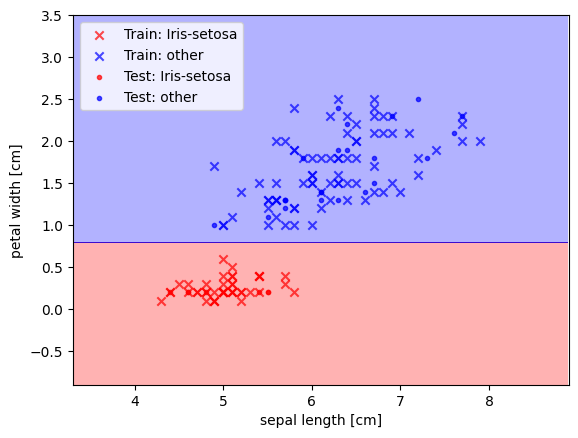

In [18]:
h_grid = model(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_grid, x2_grid, h_grid, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.xlim(x1_min, x1_max)
plt.ylabel('petal width [cm]')
plt.ylim(x2_min, x2_max)
plt.legend()

## Exercise: Ordinary least squares classifier

Implement an Ordinary Least Squares (OLS) classifier class as a **child class** of `LinearBinaryClassification`.

The class should contain a method `fit(X,Y)`, which fits the parameters of the linear classifier using the theoretical solutions of the OLS problem.

Test your method on the Iris data.